In [1]:
import torch
import matplotlib.pyplot as plt
import torch_dct as dct
from lib.tools import *
from lib.decomposition import *
from lib.jpeg import *
from lib.sketchml import *
from lib.regression import *
import os
import pandas as pd

In [4]:
# tensor_dir = "../experiments_football/tensors/"
layer =8
tensor_dir = "./test_tensors/yolov3_tiny_direct/layer"+str(layer)+"/"
output_dir = "./measurements/coco_test_diff/"

test_tensors = os.listdir(tensor_dir)

In [6]:
def sort_fun(tensor_name):
    return int(tensor_name.split("_")[2].split(".")[0])

test_tensors.sort(key=sort_fun)

In [19]:
tensor1 = torch.load(tensor_dir+test_tensors[0])
tensor2 = torch.load(tensor_dir+test_tensors[1])
tensor = tensor2 - tensor1
tensor = tensor * (abs(tensor)>0.01)

In [39]:

normalize_base, scale,zero_point, encoded_data, compressed_size_jpeg = compressor_jpeg_gray(tensor[0], 100)
reconstructed_tensor_jpeg = decompressor_jpeg_gray(tensor.shape,normalize_base, scale,zero_point, encoded_data )

Text(0, 0.5, 'Amplitude')

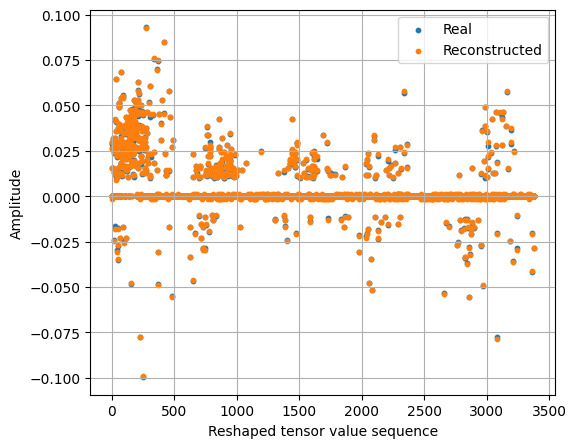

In [40]:
plot_tensor = tensor.reshape(tensor.numel())
plot_reconstructed = reconstructed_tensor_jpeg.reshape(reconstructed_tensor_jpeg.numel())
x = np.arange(0,676*5)
plt.figure(figsize=(6,5))

plt.scatter(x,plot_tensor[0:676*5],s=10, label="Real")
plt.scatter(x,plot_reconstructed[0:676*5],s=10, label="Reconstructed")
plt.grid()
plt.legend()
plt.xlabel("Reshaped tensor value sequence")
plt.ylabel("Amplitude")